In [46]:

from pathlib import Path
import torch
import sys
sys.path.insert(0, "..")   
from src.data_utils import load_raw_data, load_full_data, load_X_y_data, create_sale_features,build_feature_and_label_cols
from src.data_utils import combine_loaders_to_dataframe, generate_sales_features
import torch


In [2]:
%reload_ext autoreload
%autoreload 2

In [10]:
df = pd.read_parquet("../output/data/train_2014_January_12_store_20_item.parquet")
cols = [
        "date",
        "store_item",
        "store",
        "item",
        "weight",
        "onpromotion",
        "unit_sales"
    ]
df = df[cols]
df['store_item'] = df['store_item'].astype(str)
df.sort_values(["store_item", "date"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,date,store_item,store,item,weight,onpromotion,unit_sales
0,2014-01-02,1_1047679,1,1047679,1,None,53.0
1,2014-01-03,1_1047679,1,1047679,1,None,50.0
2,2014-01-04,1_1047679,1,1047679,1,None,32.0
3,2014-01-05,1_1047679,1,1047679,1,None,11.0
4,2014-01-06,1_1047679,1,1047679,1,None,75.0


In [11]:
df.dtypes

date           datetime64[ns]
store_item             object
store                   int64
item                    int64
weight                  int64
onpromotion            object
unit_sales            float32
dtype: object

In [12]:
df.to_csv("../output/data/train_2014_January_12_store_20_item.csv", index=False)

In [63]:
df = pd.read_parquet("../output/data/train_2014_January_12_store_20_item_cluster.parquet")
cols = [
        "date",
        "store_item",
        "store",
        "item",
        "store_cluster",
        "item_cluster",
        "weight",
        "onpromotion",
        "unit_sales"
    ]
df = df[cols]
df['store_item'] = df['store_item'].astype(str)
df.sort_values(["date", "store_item"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,date,store_item,store,item,store_cluster,item_cluster,weight,onpromotion,unit_sales
0,2014-01-01,1_1047679,1,1047679,8,1,1,False,0.0
1,2014-01-01,1_1168718,1,1168718,8,0,1,False,0.0
2,2014-01-01,1_1463591,1,1463591,8,0,1,False,0.0
3,2014-01-01,1_1463992,1,1463992,8,4,1,False,0.0
4,2014-01-01,1_1464092,1,1464092,8,5,1,False,0.0


In [64]:
df.tail()

,date,store_item,store,item,store_cluster,item_cluster,weight,onpromotion,unit_sales
7435,2014-01-31,47_671076,47,671076,1,1,1,False,6.0
7436,2014-01-31,47_807493,47,807493,1,6,1,False,118.0
7437,2014-01-31,47_850542,47,850542,1,0,1,False,0.0
7438,2014-01-31,47_864508,47,864508,1,0,1,False,0.0
7439,2014-01-31,47_864510,47,864510,1,0,1,False,0.0


In [65]:
df.query("date == '2014-01-02'").head()

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_23927/3952204710.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query("date == '2014-01-02'").head()


,date,store_item,store,item,store_cluster,item_cluster,weight,onpromotion,unit_sales
240,2014-01-02,1_1047679,1,1047679,8,1,1,False,53.0
241,2014-01-02,1_1168718,1,1168718,8,0,1,False,1.0
242,2014-01-02,1_1463591,1,1463591,8,0,1,False,3.0
243,2014-01-02,1_1463992,1,1463992,8,4,1,False,100.0
244,2014-01-02,1_1464092,1,1464092,8,5,1,False,0.0


In [66]:
df.query("store_cluster =='8' & item_cluster == '1'")

,date,store_item,store,item,store_cluster,item_cluster,weight,onpromotion,unit_sales
0,2014-01-01,1_1047679,1,1047679,8,1,1,False,0.0
15,2014-01-01,1_671076,1,671076,8,1,1,False,0.0
240,2014-01-02,1_1047679,1,1047679,8,1,1,False,53.0
255,2014-01-02,1_671076,1,671076,8,1,1,False,0.0
480,2014-01-03,1_1047679,1,1047679,8,1,1,False,50.0
...,...,...,...,...,...,...,...,...,...
6735,2014-01-29,1_671076,1,671076,8,1,1,False,1.0
6960,2014-01-30,1_1047679,1,1047679,8,1,1,False,18.0
6975,2014-01-30,1_671076,1,671076,8,1,1,False,0.0
7200,2014-01-31,1_1047679,1,1047679,8,1,1,False,49.0


In [67]:
df = pd.read_parquet("../output/data/train_2014_January_12_store_20_item_cluster_medians.parquet")
cols = [
        "date",
        "store_item",
        "store",
        "item",
        "store_cluster",
        "store_cluster_median",
        "item_cluster",
        "item_cluster_median",
        "weight",
        "onpromotion",
        "unit_sales"
    ]
df = df[cols]
df['store_item'] = df['store_item'].astype(str)
df.sort_values(["date", "store_item"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,date,store_item,store,item,store_cluster,store_cluster_median,item_cluster,item_cluster_median,weight,onpromotion,unit_sales
0,2014-01-01,1_1047679,1,1047679,8,0.0,1,0.0,1,False,0.0
1,2014-01-01,1_1168718,1,1168718,8,0.0,0,0.0,1,False,0.0
2,2014-01-01,1_1463591,1,1463591,8,0.0,0,0.0,1,False,0.0
3,2014-01-01,1_1463992,1,1463992,8,0.0,4,0.0,1,False,0.0
4,2014-01-01,1_1464092,1,1464092,8,0.0,5,0.0,1,False,0.0


In [68]:
df.query("store_cluster =='8' & item_cluster == '1'")

,date,store_item,store,item,store_cluster,store_cluster_median,item_cluster,item_cluster_median,weight,onpromotion,unit_sales
0,2014-01-01,1_1047679,1,1047679,8,0.0,1,0.0,1,False,0.0
15,2014-01-01,1_671076,1,671076,8,0.0,1,0.0,1,False,0.0
240,2014-01-02,1_1047679,1,1047679,8,0.5,1,6.5,1,False,53.0
255,2014-01-02,1_671076,1,671076,8,0.5,1,6.5,1,False,0.0
480,2014-01-03,1_1047679,1,1047679,8,0.0,1,5.5,1,False,50.0
...,...,...,...,...,...,...,...,...,...,...,...
6735,2014-01-29,1_671076,1,671076,8,0.0,1,4.0,1,False,1.0
6960,2014-01-30,1_1047679,1,1047679,8,0.0,1,3.0,1,False,18.0
6975,2014-01-30,1_671076,1,671076,8,0.0,1,3.0,1,False,0.0
7200,2014-01-31,1_1047679,1,1047679,8,0.5,1,3.0,1,False,49.0


In [ ]:
df = pd.read_parquet("../output/data/sale_data_12_store_20_item/sale_features_cluster_8_1.parquet")
cols = [
        "start_date",
        "store_item",
        "store",
        "item",
        "store_cluster",
        "store_med_day_1",
        "item_cluster",
        "item_med_day_1",
        "weight",
        "sales_day_1"
    ]
df = df[cols]
df['store_item'] = df['store_item'].astype(str)
df.sort_values(["start_date", "store_item"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,start_date,store_item,store,item,store_cluster,store_med_day_1,item_cluster,item_med_day_1,weight,sales_day_1
0,2014-01-01,1_1047679,1,1047679,8,0.0,1,0.0,1,0.0
1,2014-01-01,1_671076,1,671076,8,0.0,1,0.0,1,0.0
2,2014-01-02,1_1047679,1,1047679,8,26.5,1,26.5,1,53.0
3,2014-01-02,1_671076,1,671076,8,26.5,1,26.5,1,0.0
4,2014-01-03,1_1047679,1,1047679,8,25.0,1,25.0,1,50.0


In [79]:
df = pd.read_parquet("../output/data/clustered_data_12_store_20_item/cluster_8_1.parquet")
cols = [
        "date",
        "store_item",
        "store",
        "item",
        "store_cluster",
        "store_cluster_median",
        "item_cluster",
        "item_cluster_median",
        "weight",
        "unit_sales"
    ]
df = df[cols]
df['store_item'] = df['store_item'].astype(str)
df.sort_values(["date", "store_item"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)


,date,store_item,store,item,store_cluster,store_cluster_median,item_cluster,item_cluster_median,weight,unit_sales
0,2014-01-01,1_1047679,1,1047679,8,0.0,1,0.0,1,0.0
1,2014-01-01,1_671076,1,671076,8,0.0,1,0.0,1,0.0
2,2014-01-02,1_1047679,1,1047679,8,0.5,1,6.5,1,53.0
3,2014-01-02,1_671076,1,671076,8,0.5,1,6.5,1,0.0
4,2014-01-03,1_1047679,1,1047679,8,0.0,1,5.5,1,50.0
5,2014-01-03,1_671076,1,671076,8,0.0,1,5.5,1,0.0
6,2014-01-04,1_1047679,1,1047679,8,0.5,1,8.5,1,32.0
7,2014-01-04,1_671076,1,671076,8,0.5,1,8.5,1,1.0
8,2014-01-05,1_1047679,1,1047679,8,0.0,1,7.0,1,11.0
9,2014-01-05,1_671076,1,671076,8,0.0,1,7.0,1,0.0


In [76]:
df2 = generate_sales_features(df, window_size=1, calendar_aligned=True, log_level="DEBUG")

2025-07-28 10:43:25,602 - INFO - Total rows: 62
2025-07-28 10:43:25,608 - DEBUG - Unique store_clusters: ['8']
2025-07-28 10:43:25,610 - DEBUG - Unique item_clusters: ['1']
2025-07-28 10:43:25,619 - DEBUG - Store vs. Item cluster crosstab:
item_cluster    1
store_cluster    
8              62


2025-07-28 10:43:25,622 - DEBUG - Generating rolling windows
2025-07-28 10:43:25,634 - INFO - Processing window: 2014-01-01 00:00:00 to 2014-01-01 00:00:00
Window 2014-01-01:   0%|          | 0/2 [00:00<?, ?it/s]2025-07-28 10:43:25,673 - DEBUG - Store med: 0.0
2025-07-28 10:43:25,675 - DEBUG - Item med: 0.0
2025-07-28 10:43:25,678 - DEBUG - Store med: 0.0
2025-07-28 10:43:25,679 - DEBUG - Item med: 0.0
Window 2014-01-01: 100%|██████████| 2/2 [00:00<00:00, 193.48it/s]
2025-07-28 10:43:25,682 - INFO - Processing window: 2014-01-02 00:00:00 to 2014-01-02 00:00:00
Window 2014-01-02:   0%|          | 0/2 [00:00<?, ?it/s]2025-07-28 10:43:25,703 - DEBUG - Store med: 0.5
2025-07-28 10:43:25,705 - DEBUG - Item med: 6.5
2025-07-28 10:43:25,707 - DEBUG - Store med: 0.5
2025-07-28 10:43:25,708 - DEBUG - Item med: 6.5
Window 2014-01-02: 100%|██████████| 2/2 [00:00<00:00, 255.03it/s]
2025-07-28 10:43:25,710 - INFO - Processing window: 2014-01-03 00:00:00 to 2014-01-03 00:00:00
Window 2014-01-03:   0

In [81]:
np.log(53/6.5)

2.09848973665053

In [78]:
df2.head(10)

,start_date,store_item,store,item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,item_med_logpct_change_1,sales_day_1
0,2014-01-01,1_671076,1,671076,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,-6.907755,0.0
1,2014-01-01,1_1047679,1,1047679,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,-6.907755,0.0
2,2014-01-02,1_671076,1,671076,8,1,1,0.5,6.5,0.0,0.000000,-6.907755,-6.907755,0.0
3,2014-01-02,1_1047679,1,1047679,8,1,1,0.5,6.5,106.0,8.153846,4.663439,2.098490,53.0
4,2014-01-03,1_671076,1,671076,8,1,1,0.0,5.5,0.0,0.000000,-6.907755,-6.907755,0.0
5,2014-01-03,1_1047679,1,1047679,8,1,1,0.0,5.5,50000.0,9.090909,10.819778,2.207275,50.0
6,2014-01-04,1_671076,1,671076,8,1,1,0.5,8.5,2.0,0.117647,0.693147,-2.140066,1.0
7,2014-01-04,1_1047679,1,1047679,8,1,1,0.5,8.5,64.0,3.764706,4.158883,1.325670,32.0
8,2014-01-05,1_671076,1,671076,8,1,1,0.0,7.0,0.0,0.000000,-6.907755,-6.907755,0.0
9,2014-01-05,1_1047679,1,1047679,8,1,1,0.0,7.0,11000.0,1.571429,9.305651,0.451985,11.0


In [85]:
df = pd.read_parquet("../output/data/sale_data_12_store_20_item/sale_features_cluster_8_1.parquet")
df.sort_values(["start_date", "store_item"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,start_date,store_item,store,item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,item_med_logpct_change_1,sales_day_1
0,2014-01-01,1_1047679,1,1047679,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,-6.907755,0.0
1,2014-01-01,1_671076,1,671076,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,-6.907755,0.0
2,2014-01-02,1_1047679,1,1047679,8,1,1,0.5,6.5,106.0,8.153846,4.663439,2.098490,53.0
3,2014-01-02,1_671076,1,671076,8,1,1,0.5,6.5,0.0,0.000000,-6.907755,-6.907755,0.0
4,2014-01-03,1_1047679,1,1047679,8,1,1,0.0,5.5,50000.0,9.090909,10.819778,2.207275,50.0
5,2014-01-03,1_671076,1,671076,8,1,1,0.0,5.5,0.0,0.000000,-6.907755,-6.907755,0.0
6,2014-01-04,1_1047679,1,1047679,8,1,1,0.5,8.5,64.0,3.764706,4.158883,1.325670,32.0
7,2014-01-04,1_671076,1,671076,8,1,1,0.5,8.5,2.0,0.117647,0.693147,-2.140066,1.0
8,2014-01-05,1_1047679,1,1047679,8,1,1,0.0,7.0,11000.0,1.571429,9.305651,0.451985,11.0
9,2014-01-05,1_671076,1,671076,8,1,1,0.0,7.0,0.0,0.000000,-6.907755,-6.907755,0.0


In [91]:
df = pd.read_parquet("../output/data/sale_cyc_data_12_store_20_item/sale_cyc_features_8_1.parquet")
df.sort_values(["start_date", "store_item"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,start_date,store_item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,...,dayofweek_sin_1,dayofweek_cos_1,weekofmonth_sin_1,weekofmonth_cos_1,monthofyear_sin_1,monthofyear_cos_1,paycycle_sin_1,paycycle_cos_1,season_sin_1,season_cos_1
0,2014-01-01,1_1047679,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,...,0.974928,-0.222521,0.951057,0.309017,0.5,0.866025,0.406737,0.913545,-0.974100,0.226116
1,2014-01-01,1_671076,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,...,0.974928,-0.222521,0.951057,0.309017,0.5,0.866025,0.406737,0.913545,-0.974100,0.226116
2,2014-01-02,1_1047679,8,1,1,0.5,6.5,106.0,8.153846,4.663439,...,0.433884,-0.900969,0.951057,0.309017,0.5,0.866025,0.743145,0.669131,-0.970064,0.242850
3,2014-01-02,1_671076,8,1,1,0.5,6.5,0.0,0.000000,-6.907755,...,0.433884,-0.900969,0.951057,0.309017,0.5,0.866025,0.743145,0.669131,-0.970064,0.242850
4,2014-01-03,1_1047679,8,1,1,0.0,5.5,50000.0,9.090909,10.819778,...,-0.433884,-0.900969,0.951057,0.309017,0.5,0.866025,0.951057,0.309017,-0.965740,0.259512
5,2014-01-03,1_671076,8,1,1,0.0,5.5,0.0,0.000000,-6.907755,...,-0.433884,-0.900969,0.951057,0.309017,0.5,0.866025,0.951057,0.309017,-0.965740,0.259512
6,2014-01-04,1_1047679,8,1,1,0.5,8.5,64.0,3.764706,4.158883,...,-0.974928,-0.222521,0.951057,0.309017,0.5,0.866025,0.994522,-0.104529,-0.961130,0.276097
7,2014-01-04,1_671076,8,1,1,0.5,8.5,2.0,0.117647,0.693147,...,-0.974928,-0.222521,0.951057,0.309017,0.5,0.866025,0.994522,-0.104529,-0.961130,0.276097
8,2014-01-05,1_1047679,8,1,1,0.0,7.0,11000.0,1.571429,9.305651,...,-0.781832,0.623490,0.951057,0.309017,0.5,0.866025,0.866025,-0.500000,-0.956235,0.292600
9,2014-01-05,1_671076,8,1,1,0.0,7.0,0.0,0.000000,-6.907755,...,-0.781832,0.623490,0.951057,0.309017,0.5,0.866025,0.866025,-0.500000,-0.956235,0.292600


In [96]:
col = ['start_date', 'store_item', 'store_cluster', 'item_cluster', 'weight',
       'store_med_day_1', 'item_med_day_1', 'store_med_change_1',
       'item_med_change_1', 'store_med_logpct_change_1',
       'item_med_logpct_change_1', 'sales_day_1']
df = df[col]
df.head(10)

,start_date,store_item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,item_med_logpct_change_1,sales_day_1
0,2014-01-01,1_1047679,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,-6.907755,0.0
1,2014-01-01,1_671076,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,-6.907755,0.0
2,2014-01-02,1_1047679,8,1,1,0.5,6.5,106.0,8.153846,4.663439,2.098490,53.0
3,2014-01-02,1_671076,8,1,1,0.5,6.5,0.0,0.000000,-6.907755,-6.907755,0.0
4,2014-01-03,1_1047679,8,1,1,0.0,5.5,50000.0,9.090909,10.819778,2.207275,50.0
5,2014-01-03,1_671076,8,1,1,0.0,5.5,0.0,0.000000,-6.907755,-6.907755,0.0
6,2014-01-04,1_1047679,8,1,1,0.5,8.5,64.0,3.764706,4.158883,1.325670,32.0
7,2014-01-04,1_671076,8,1,1,0.5,8.5,2.0,0.117647,0.693147,-2.140066,1.0
8,2014-01-05,1_1047679,8,1,1,0.0,7.0,11000.0,1.571429,9.305651,0.451985,11.0
9,2014-01-05,1_671076,8,1,1,0.0,7.0,0.0,0.000000,-6.907755,-6.907755,0.0


In [97]:
df = pd.read_parquet("../output/data/sale_cyc_features_X_1_day_y_12_store_20_item/sale_cyc_features_X_1_day_y_8_1.parquet")
df.sort_values(["start_date", "store_item"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,start_date,store_item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,...,weekofmonth_cos_1,monthofyear_sin_1,monthofyear_cos_1,paycycle_sin_1,paycycle_cos_1,season_sin_1,season_cos_1,y_store_med_logpct_change_1,y_item_med_logpct_change_1,y_sales_day_1
0,2014-01-01,1_1047679,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,...,0.309017,0.5,0.866025,0.406737,0.913545,-0.974100,0.226116,4.663439,2.098490,53.0
1,2014-01-01,1_671076,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,...,0.309017,0.5,0.866025,0.406737,0.913545,-0.974100,0.226116,-6.907755,-6.907755,0.0
2,2014-01-02,1_1047679,8,1,1,0.5,6.5,106.0,8.153846,4.663439,...,0.309017,0.5,0.866025,0.743145,0.669131,-0.970064,0.242850,10.819778,2.207275,50.0
3,2014-01-02,1_671076,8,1,1,0.5,6.5,0.0,0.000000,-6.907755,...,0.309017,0.5,0.866025,0.743145,0.669131,-0.970064,0.242850,-6.907755,-6.907755,0.0
4,2014-01-03,1_1047679,8,1,1,0.0,5.5,50000.0,9.090909,10.819778,...,0.309017,0.5,0.866025,0.951057,0.309017,-0.965740,0.259512,4.158883,1.325670,32.0


In [98]:
col = ['start_date', 'store_item', 'store_cluster', 'item_cluster', 'weight',
       'store_med_day_1', 'item_med_day_1', 'store_med_change_1',
       'item_med_change_1', 'store_med_logpct_change_1',
       'item_med_logpct_change_1', 'sales_day_1']
df2 = df[col]
df2.head(10)

,start_date,store_item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,item_med_logpct_change_1,sales_day_1
0,2014-01-01,1_1047679,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,-6.907755,0.0
1,2014-01-01,1_671076,8,1,1,0.0,0.0,0.0,0.000000,-6.907755,-6.907755,0.0
2,2014-01-02,1_1047679,8,1,1,0.5,6.5,106.0,8.153846,4.663439,2.098490,53.0
3,2014-01-02,1_671076,8,1,1,0.5,6.5,0.0,0.000000,-6.907755,-6.907755,0.0
4,2014-01-03,1_1047679,8,1,1,0.0,5.5,50000.0,9.090909,10.819778,2.207275,50.0
5,2014-01-03,1_671076,8,1,1,0.0,5.5,0.0,0.000000,-6.907755,-6.907755,0.0
6,2014-01-04,1_1047679,8,1,1,0.5,8.5,64.0,3.764706,4.158883,1.325670,32.0
7,2014-01-04,1_671076,8,1,1,0.5,8.5,2.0,0.117647,0.693147,-2.140066,1.0
8,2014-01-05,1_1047679,8,1,1,0.0,7.0,11000.0,1.571429,9.305651,0.451985,11.0
9,2014-01-05,1_671076,8,1,1,0.0,7.0,0.0,0.000000,-6.907755,-6.907755,0.0


In [102]:
col = ['start_date', 'store_item', 'store_cluster', 'item_cluster','weight',
       'y_store_med_logpct_change_1', 'y_item_med_logpct_change_1',
       'y_sales_day_1']
df[col].head(10)

,start_date,store_item,store_cluster,item_cluster,weight,y_store_med_logpct_change_1,y_item_med_logpct_change_1,y_sales_day_1
0,2014-01-01,1_1047679,8,1,1,4.663439,2.098490,53.0
1,2014-01-01,1_671076,8,1,1,-6.907755,-6.907755,0.0
2,2014-01-02,1_1047679,8,1,1,10.819778,2.207275,50.0
3,2014-01-02,1_671076,8,1,1,-6.907755,-6.907755,0.0
4,2014-01-03,1_1047679,8,1,1,4.158883,1.325670,32.0
5,2014-01-03,1_671076,8,1,1,0.693147,-2.140066,1.0
6,2014-01-04,1_1047679,8,1,1,9.305651,0.451985,11.0
7,2014-01-04,1_671076,8,1,1,-6.907755,-6.907755,0.0
8,2014-01-05,1_1047679,8,1,1,4.317488,2.371578,75.0
9,2014-01-05,1_671076,8,1,1,0.000000,-1.945910,1.0


In [143]:
import torch
import pandas as pd
from typing import List
from pathlib import Path

def dataloader_to_dataframe(
    loader_path: Path,
    meta_path: Path,
    meta_cols: List[str],
    x_feature_cols: List[str],
    label_cols: List[str],
    weight_col: str = "weight",
) -> pd.DataFrame:
    """
    Load a saved DataLoader (.pt) and convert its dataset into a pandas DataFrame.

    Parameters
    ----------
    loader_path : Path
        Path to the saved DataLoader (.pt file).
    meta_path : Path
        Path to the meta information file (.parquet).
    x_feature_cols : List[str]
        List of input feature column names.
    label_cols : List[str]
        List of label (target) column names.
    weight_col : str
        Column name for sample weights.

    Returns
    -------
    pd.DataFrame
        Combined DataFrame with meta info, inputs, targets, and weights.
    """
    data = torch.load(loader_path)
    loader = torch.utils.data.DataLoader(data.dataset, batch_size=32)

    all_x, all_y, all_w = [], [], []

    with torch.no_grad():
        for xb, yb, wb in loader:
            all_x.append(xb.cpu())
            all_y.append(yb.cpu())
            all_w.append(wb.cpu())

    x_tensor = torch.cat(all_x, dim=0)
    y_tensor = torch.cat(all_y, dim=0)
    w_tensor = torch.cat(all_w, dim=0)

    df_x = pd.DataFrame(x_tensor.numpy(), columns=x_feature_cols)
    df_y = pd.DataFrame(y_tensor.numpy(), columns=label_cols)
    df_w = pd.DataFrame(w_tensor.numpy(), columns=[weight_col])

    df_data = pd.concat([df_x, df_y, df_w], axis=1)

    if meta_path.exists():
        print(f"Loading meta file from: {meta_path}")
        meta_df = pd.read_parquet(meta_path).reset_index(drop=True)
        df_data = pd.concat([meta_df, df_data.reset_index(drop=True)], axis=1)
    else:
        print(f"Meta file not found at: {meta_path}")

    all_cols = meta_cols + x_feature_cols + label_cols + [weight_col]
    return df_data[all_cols]


In [144]:
meta_cols, x_sales_features, x_cyclical_features, x_feature_cols, x_to_log_features, x_log_features, label_cols, y_log_features, y_to_log_features, all_features = build_feature_and_label_cols(window_size=1)
print(
        meta_cols,
        x_sales_features,
        x_cyclical_features,
        x_feature_cols,
        x_to_log_features,
        x_log_features,
        label_cols,
        y_log_features,
        y_to_log_features,
        all_features,
    )

['start_date', 'store_item', 'store_cluster', 'item_cluster'] ['store_med_day_1', 'item_med_day_1', 'store_med_change_1', 'item_med_change_1', 'store_med_logpct_change_1', 'item_med_logpct_change_1', 'sales_day_1'] ['dayofweek_sin_1', 'dayofweek_cos_1', 'weekofmonth_sin_1', 'weekofmonth_cos_1', 'monthofyear_sin_1', 'monthofyear_cos_1', 'paycycle_sin_1', 'paycycle_cos_1', 'season_sin_1', 'season_cos_1'] ['store_med_day_1', 'item_med_day_1', 'store_med_change_1', 'item_med_change_1', 'store_med_logpct_change_1', 'item_med_logpct_change_1', 'sales_day_1', 'dayofweek_sin_1', 'dayofweek_cos_1', 'weekofmonth_sin_1', 'weekofmonth_cos_1', 'monthofyear_sin_1', 'monthofyear_cos_1', 'paycycle_sin_1', 'paycycle_cos_1', 'season_sin_1', 'season_cos_1'] ['store_med_day_1', 'item_med_day_1', 'store_med_change_1', 'item_med_change_1', 'sales_day_1'] ['store_med_logpct_change_1', 'item_med_logpct_change_1'] ['y_sales_day_1', 'y_store_med_logpct_change_1', 'y_item_med_logpct_change_1'] ['y_sales_day_1'] 

In [145]:
meta_cols + x_feature_cols + label_cols 

['start_date',
 'store_item',
 'store_cluster',
 'item_cluster',
 'store_med_day_1',
 'item_med_day_1',
 'store_med_change_1',
 'item_med_change_1',
 'store_med_logpct_change_1',
 'item_med_logpct_change_1',
 'sales_day_1',
 'dayofweek_sin_1',
 'dayofweek_cos_1',
 'weekofmonth_sin_1',
 'weekofmonth_cos_1',
 'monthofyear_sin_1',
 'monthofyear_cos_1',
 'paycycle_sin_1',
 'paycycle_cos_1',
 'season_sin_1',
 'season_cos_1',
 'y_sales_day_1',
 'y_store_med_logpct_change_1',
 'y_item_med_logpct_change_1']

In [146]:
df = dataloader_to_dataframe(
    loader_path=Path("../output/data/dataloader_12_store_20_item/8_1_train_loader.pt"),
    meta_path= Path("../output/data/dataloader_12_store_20_item/8_1_train_meta.parquet"),
    meta_cols= meta_cols,
    x_feature_cols= x_feature_cols,
    label_cols= label_cols,
)
#df[all_features].head()

Loading meta file from: ../output/data/dataloader_12_store_20_item/8_1_train_meta.parquet


In [147]:
df.columns

Index(['start_date', 'store_item', 'store_cluster', 'item_cluster',
       'store_med_day_1', 'item_med_day_1', 'store_med_change_1',
       'item_med_change_1', 'store_med_logpct_change_1',
       'item_med_logpct_change_1', 'sales_day_1', 'dayofweek_sin_1',
       'dayofweek_cos_1', 'weekofmonth_sin_1', 'weekofmonth_cos_1',
       'monthofyear_sin_1', 'monthofyear_cos_1', 'paycycle_sin_1',
       'paycycle_cos_1', 'season_sin_1', 'season_cos_1', 'y_sales_day_1',
       'y_store_med_logpct_change_1', 'y_item_med_logpct_change_1', 'weight'],
      dtype='object')

In [148]:
df.shape

(59, 25)

In [149]:
df

,start_date,store_item,store_cluster,item_cluster,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,item_med_logpct_change_1,...,monthofyear_sin_1,monthofyear_cos_1,paycycle_sin_1,paycycle_cos_1,season_sin_1,season_cos_1,y_sales_day_1,y_store_med_logpct_change_1,y_item_med_logpct_change_1,weight
0,2014-01-01,1_1047679,8,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.704489,9.562952e-01,0.000000,0.000000,3.988984,1.734031,1.130915,1.0
1,2014-01-02,1_1047679,8,1,0.584963,0.894999,0.431878,0.622773,0.921088,0.431011,...,0.0,0.0,0.873619,8.327377e-01,0.017772,0.038141,3.931826,2.469774,1.165422,1.0
2,2014-01-03,1_1047679,8,1,0.000000,0.831435,1.000000,0.650185,0.907889,1.000000,...,0.0,0.0,0.978148,6.506919e-01,0.036810,0.076119,3.496508,1.640720,0.844008,1.0
3,2014-01-04,1_1047679,8,1,0.584963,1.000000,0.385810,0.439123,0.807371,0.384378,...,0.0,0.0,1.000000,4.416349e-01,0.057107,0.113921,2.484907,2.332692,0.372932,1.0
4,2014-01-05,1_1047679,8,1,0.000000,0.923666,0.860066,0.265645,0.573784,0.860059,...,0.0,0.0,0.935398,2.417148e-01,0.078659,0.151535,4.330733,1.671001,1.215381,1.0
5,2014-01-06,1_1047679,8,1,1.000000,0.923666,0.400260,0.692143,1.000000,0.399037,...,0.0,0.0,0.795511,8.549950e-02,0.101458,0.188953,3.555348,1.652403,1.509918,1.0
6,2014-01-07,1_1047679,8,1,0.584963,0.307889,0.391330,1.000000,0.820958,0.389981,...,0.0,0.0,0.604528,0.000000e+00,0.125497,0.226163,2.708050,2.355824,0.812157,1.0
7,2014-01-08,1_1047679,8,1,0.000000,0.714895,0.882353,0.423046,0.625310,0.882348,...,0.0,0.0,0.395471,5.960464e-08,0.150771,0.263152,3.295837,2.412860,1.100389,1.0
8,2014-01-09,1_1047679,8,1,0.000000,0.668095,0.939564,0.599555,0.761034,0.939562,...,0.0,0.0,0.204488,8.549958e-02,0.177271,0.299911,3.218876,2.405666,0.835624,1.0
9,2014-01-10,1_1047679,8,1,0.000000,0.894999,0.932166,0.434817,0.743263,0.932164,...,0.0,0.0,0.064602,2.417149e-01,0.204988,0.336427,3.295837,2.412860,0.902734,1.0


In [5]:
df = load_full_data(Path("../output/data/train_top_store_15_item_clusters_sales_cyclical_features.parquet"),
                    window_size=1,
                    log_level="DEBUG",
                    output_fn  = None,
                    )
df.head()

2025-07-21 08:54:19,719 - INFO - Loading data from ../output/data/train_top_store_15_item_clusters_sales_cyclical_features.parquet
2025-07-21 08:54:19,734 - INFO - Loaded data with shape (1700, 22)


,start_date,store_item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,...,dayofweek_sin_1,dayofweek_cos_1,weekofmonth_sin_1,weekofmonth_cos_1,monthofyear_sin_1,monthofyear_cos_1,paycycle_sin_1,paycycle_cos_1,season_sin_1,season_cos_1
0,2014-01-02,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.433884,-0.900969,0.951057,0.309017,0.5,0.866025,0.743145,0.669131,-0.970064,0.242850
1,2014-01-03,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,-0.433884,-0.900969,0.951057,0.309017,0.5,0.866025,0.951057,0.309017,-0.965740,0.259512
2,2014-01-04,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,-0.974928,-0.222521,0.951057,0.309017,0.5,0.866025,0.994522,-0.104529,-0.961130,0.276097
3,2014-01-05,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,-0.781832,0.623490,0.951057,0.309017,0.5,0.866025,0.866025,-0.500000,-0.956235,0.292600
4,2014-01-06,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.000000,1.000000,0.951057,0.309017,0.5,0.866025,0.587785,-0.809017,-0.951056,0.309017


In [6]:
df.columns

Index(['start_date', 'store_item', 'store_cluster', 'item_cluster', 'weight',
       'store_med_day_1', 'item_med_day_1', 'store_med_change_1',
       'item_med_change_1', 'store_med_logpct_change_1',
       'item_med_logpct_change_1', 'sales_day_1', 'dayofweek_sin_1',
       'dayofweek_cos_1', 'weekofmonth_sin_1', 'weekofmonth_cos_1',
       'monthofyear_sin_1', 'monthofyear_cos_1', 'paycycle_sin_1',
       'paycycle_cos_1', 'season_sin_1', 'season_cos_1'],
      dtype='object')

<Axes: >

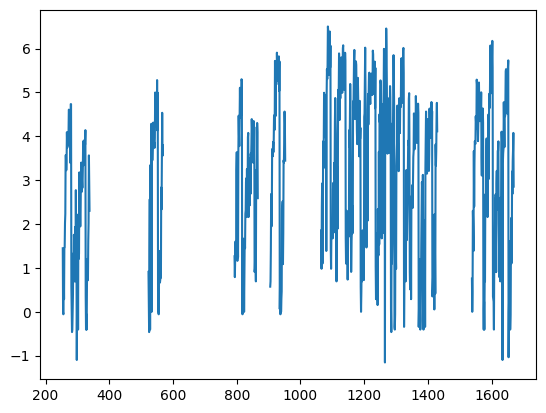

In [7]:
df["store_med_logpct_change_1"].plot()

In [5]:
df = load_X_y_data(Path("../output/data/train_top_store_15_item_clusters_sales_cyclical_features_X_1_day_y.parquet"), window_size=1, log_level="DEBUG")
df.head()

2025-07-17 15:11:06,228 - INFO - Loading data from ../output/data/train_top_store_15_item_clusters_sales_cyclical_features_X_1_day_y.parquet
2025-07-17 15:11:06,241 - INFO - Loaded data with shape (1354, 25)


,start_date,store_item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,...,weekofmonth_cos_1,monthofyear_sin_1,monthofyear_cos_1,paycycle_sin_1,paycycle_cos_1,season_sin_1,season_cos_1,y_sales_day_1,y_store_med_logpct_change_1,y_item_med_logpct_change_1
0,2014-01-02,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.309017,0.5,0.866025,0.743145,0.669131,-0.970064,0.242850,41.0,NaN,NaN
1,2014-01-03,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.309017,0.5,0.866025,0.951057,0.309017,-0.965740,0.259512,11.0,NaN,NaN
2,2014-01-04,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.309017,0.5,0.866025,0.994522,-0.104529,-0.961130,0.276097,44.0,NaN,NaN
3,2014-01-05,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.309017,0.5,0.866025,0.866025,-0.500000,-0.956235,0.292600,96.0,NaN,NaN
4,2014-01-06,10_1143685,0,0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.309017,0.5,0.866025,0.587785,-0.809017,-0.951056,0.309017,26.0,NaN,NaN


In [22]:
df = combine_loaders_to_dataframe(
    dataloader_dir=Path("../output/data/dataloader/"),
    x_feature_cols= x_feature_cols,
    label_cols= label_cols,
    store_cluster= 0,
    loader_type= "val",  # or "train"
    log_level= "INFO",
)

2025-07-24 11:44:31,871 - INFO - Loading ../output/data/dataloader
2025-07-24 11:44:31,874 - INFO - Loader type: val
2025-07-24 11:44:31,876 - INFO - Store cluster: 0
2025-07-24 11:44:31,876 - INFO - Item cluster: None
2025-07-24 11:44:31,878 - INFO - Loading 0_10_val_loader.pt (store_cluster=0, item_cluster=10)
2025-07-24 11:44:31,879 - INFO - Loading 0_10_val_loader.pt


2025-07-24 11:44:33,076 - INFO - Loading ../output/data/dataloader/0_10_val_meta.parquet
2025-07-24 11:44:33,179 - INFO - Loading 0_4_val_loader.pt (store_cluster=0, item_cluster=4)
2025-07-24 11:44:33,180 - INFO - Loading 0_4_val_loader.pt
2025-07-24 11:44:33,698 - INFO - Loading ../output/data/dataloader/0_4_val_meta.parquet


In [26]:
df

,start_date,store_item,store_cluster,item_cluster,weight,store_med_day_1,item_med_day_1,store_med_change_1,item_med_change_1,store_med_logpct_change_1,...,monthofyear_sin_1,monthofyear_cos_1,paycycle_sin_1,paycycle_cos_1,season_sin_1,season_cos_1,y_sales_day_1,y_store_med_logpct_change_1,y_item_med_logpct_change_1,weight
0,2014-01-03,23_1004551,0,10,1,0.876336,0.876336,0.059709,0.059709,0.358794,...,0.75,0.933013,0.978148,6.506919e-01,0.017126,0.629749,2.639057,0.481833,0.481833,1.0
1,2014-01-06,23_1004551,0,10,1,0.743335,0.743335,0.067434,0.067434,0.330371,...,0.75,0.933013,0.795511,8.549950e-02,0.024467,0.654502,1.386294,0.000000,0.000000,1.0
2,2014-01-07,23_1004551,0,10,1,0.724807,0.724807,0.048206,0.048206,0.255610,...,0.75,0.933013,0.604528,0.000000e+00,0.027197,0.662665,1.791759,0.000000,0.000000,1.0
3,2014-01-08,23_1004551,0,10,1,0.876336,0.876336,0.052214,0.052214,0.330371,...,0.75,0.933013,0.395471,5.960464e-08,0.030068,0.670779,1.945910,0.340368,0.340368,1.0
4,2014-01-09,23_1004551,0,10,1,0.724807,0.724807,0.078931,0.078931,0.358794,...,0.75,0.933013,0.204488,8.549958e-02,0.033077,0.678843,2.564949,0.684413,0.684413,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160007,2015-12-26,5_968432,0,4,1,0.831638,0.831638,0.181481,0.181481,0.502276,...,0.50,1.000000,0.500000,1.000000e+00,0.003884,0.562232,3.258096,0.284054,0.284054,1.0
160008,2015-12-27,5_968432,0,4,1,0.711115,0.711115,0.236214,0.236214,0.537510,...,0.50,1.000000,0.500000,1.000000e+00,0.005029,0.570762,3.367296,0.404792,0.404792,1.0
160009,2015-12-28,5_968432,0,4,1,0.666667,0.666667,0.264050,0.264050,0.555526,...,0.50,1.000000,0.500000,1.000000e+00,0.006321,0.579272,3.135494,0.136804,0.136804,1.0
160010,2015-12-29,5_968432,0,4,1,0.753284,0.753284,0.208629,0.208629,0.517284,...,0.50,1.000000,0.500000,1.000000e+00,0.007759,0.587758,3.401197,0.208478,0.208478,1.0


In [27]:
df.to_csv("../output/data/store_0df.csv", index=False)